<a href="https://colab.research.google.com/github/Kiron-Ang/Vaccination/blob/main/vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Print R version
R.version.string

# Install RSocrata
# github.com/chicago/rsocrata
install.packages("RSocrata")

# Install ggplot2
install.packages("ggplot2")

[1] "R version 4.4.1 (2024-06-14)"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Load RSocrata
library("RSocrata")

# Load ggplot2
library(ggplot2)

# Set plot width and plot height
options(repr.plot.width=15, repr.plot.height=15)

# Read data
# dev.socrata.com/foundry/data.cdc.gov/ee48-w5t6
# data.cdc.gov/Teen-Vaccinations/Vaccination-Coverage-among-Adolescents-13-17-Years/ee48-w5t6
data = read.socrata("https://data.cdc.gov/resource/ee48-w5t6.json")

# Print data dimensions
dim(data)

# Print first 6 data lines
head(data)

[1] 27565    10

,vaccine,dose,geography_type,geography,year_season,dimension_type,dimension,coverage_estimate,X_95_ci,population_sample_size
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,HPV,"≥1 Dose, Males",States/Local Areas,New York,2023,Age,13-17 Years,81.5,75.2 to 86.5,289
2,Tetanus,≥1 Dose Tdap,States/Local Areas,New York,2023,Age,13-17 Years,90.2,86.8 to 92.8,559
3,Tetanus,≥1 Dose Td or Tdap,States/Local Areas,New York,2023,Age,13-17 Years,93.6,90.9 to 95.5,559
4,≥1 Dose MenACWY,,States/Local Areas,New York,2023,Age,13-17 Years,95.3,92.7 to 97.0,559
5,HPV,"≥1 Dose, Males and Females",States/Local Areas,New York,2023,Age,13-17 Years,79.4,74.8 to 83.3,559
6,HPV,"Up-to-Date, Males",States/Local Areas,New York,2023,Age,13-17 Years,67.8,60.8 to 74.2,289


In [3]:
# Convert coverage_estimate to numeric
data$coverage_estimate = as.numeric(data$coverage_estimate)

# Print unique vaccines
unique(data$vaccine)

Warning message:
“NAs introduced by coercion”


[1] "HPV"             "Tetanus"         "≥1 Dose MenACWY" "≥3 Doses HepB"  
[5] "≥2 Doses MMR"    "Varicella"       "≥2 Doses Hep A"

In [4]:
# Filter data
data = data[data$vaccine %in% c("HPV", "Tetanus", "≥1 Dose MenACWY"), ]

# Print data dimensions
dim(data)

[1] 18953    10

In [5]:
# Print vaccines and doses in order
unique(data[c("vaccine", "dose")][order(data$vaccine), ])

,vaccine,dose
,<chr>,<chr>
4,≥1 Dose MenACWY,
1,HPV,"≥1 Dose, Males"
5,HPV,"≥1 Dose, Males and Females"
6,HPV,"Up-to-Date, Males"
7,HPV,"≥1 Dose, Females"
8,HPV,"Up-to-Date, Males and Females"
19,HPV,"Up-to-Date, Females"
23,HPV,"≥2 Doses, Females"
82,HPV,"≥3 Doses, Females"


In [6]:
# Print unique dimension types
unique(data$dimension_type)

[1] "Age"                "Insurance Coverage" "Poverty"           
[4] "Race and Ethnicity" "Urbanicity"         "Overall"

In [7]:
# Filter data
data = data[data$dimension_type == "Age", ]

# Print data dimensions
dim(data)

[1] 15715    10

In [8]:
# Print unique dimensions
unique(data$dimension)

[1] "13-17 Years" "13-15 Years"

In [9]:
# Filter data
data = data[data$dimension == "13-17 Years", ]

# Print data dimensions
dim(data)

[1] 11294    10

In [10]:
# Print first 6 data lines
head(data)

,vaccine,dose,geography_type,geography,year_season,dimension_type,dimension,coverage_estimate,X_95_ci,population_sample_size
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,HPV,"≥1 Dose, Males",States/Local Areas,New York,2023,Age,13-17 Years,81.5,75.2 to 86.5,289
2,Tetanus,≥1 Dose Tdap,States/Local Areas,New York,2023,Age,13-17 Years,90.2,86.8 to 92.8,559
3,Tetanus,≥1 Dose Td or Tdap,States/Local Areas,New York,2023,Age,13-17 Years,93.6,90.9 to 95.5,559
4,≥1 Dose MenACWY,,States/Local Areas,New York,2023,Age,13-17 Years,95.3,92.7 to 97.0,559
5,HPV,"≥1 Dose, Males and Females",States/Local Areas,New York,2023,Age,13-17 Years,79.4,74.8 to 83.3,559
6,HPV,"Up-to-Date, Males",States/Local Areas,New York,2023,Age,13-17 Years,67.8,60.8 to 74.2,289


In [11]:
# Print unique geography types
unique(data$geography_type)

[1] "States/Local Areas"   "HHS Regions/National"

In [12]:
# Filter data
data = data[data$geography_type == "States/Local Areas", ]

# Print data dimensions
dim(data)

[1] 9507   10

In [13]:
# Print unique geographies
unique(data$geography)

[1] "New York"             "New Hampshire"        "Colorado"            
 [4] "Nebraska"             "IL-Rest of state"     "IL-City of Chicago"  
 [7] "PA-Philadelphia"      "PA-Rest of state"     "U.S. Virgin Islands" 
[10] "TX-Rest of state"     "Minnesota"            "Florida"             
[13] "Oklahoma"             "Nevada"               "Mississippi"         
[16] "Montana"              "Tennessee"            "Missouri"            
[19] "Washington"           "Guam"                 "Maine"               
[22] "Kansas"               "Alabama"              "Utah"                
[25] "California"           "Alaska"               "Kentucky"            
[28] "Delaware"             "Texas"                "Idaho"               
[31] "Virginia"             "Iowa"                 "Hawaii"              
[34] "Wyoming"              "Arkansas"             "Georgia"             
[37] "South Dakota"         "Connecticut"          "Oregon"              
[40] "Rhode Island"         "New Mexico"           "Michigan"            
[43] "Louisiana"            "West Virginia"        "Massachusetts"       
[46] "District of Columbia" "TX-City of Houston"   "TX-Bexar County"     
[49] "Pennsylvania"         "North Carolina"       "Puerto Rico"         
[52] "Maryland"             "New Jersey"           "NY-City of New York" 
[55] "NY-Rest of state"     "North Dakota"         "TX-Dallas County"    
[58] "TX-El Paso County"    "TX-Tarrant County"    "TX-Hidalgo County"   
[61] "TX-Travis County"     "Wisconsin"            "Illinois"            
[64] "Ohio"                 "Arizona"              "South Carolina"      
[67] "Indiana"              "Vermont"

In [14]:
# List of all 50 states and the District of Columbia
states = c("Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
            "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana",
            "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts",
            "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
            "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina",
            "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island",
            "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
            "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming", "District of Columbia")

# Filter data for all 50 states and the District of Columbia
data = data[data$geography %in% states, ]

# Print data dimensions
dim(data)

[1] 7702   10

In [15]:
# Print unique year seasons
unique(data$year_season)

[1] "2023" "2022" "2020" "2018" "2019" "2021" "2014" "2015" "2013" "2017"
[11] "2016" "2011" "2012" "2010" "2008" "2009"

In [16]:
# HPV data
hpv = data[data$vaccine == "HPV" & data$dose == "≥1 Dose, Males and Females", ]

# Print HPV data dimensions
dim(hpv)

# MenACWY data
menacwy = data[data$vaccine == "≥1 Dose MenACWY", ]

# Print MenACWY data dimensions
dim(menacwy)

# Tetanus data
tetanus = data[data$vaccine == "Tetanus" & data$dose == "≥1 Dose Td or Tdap", ]

# Print Tetanus data dimensions
dim(tetanus)

[1] 408  10

[1] 816  10

[1] 816  10

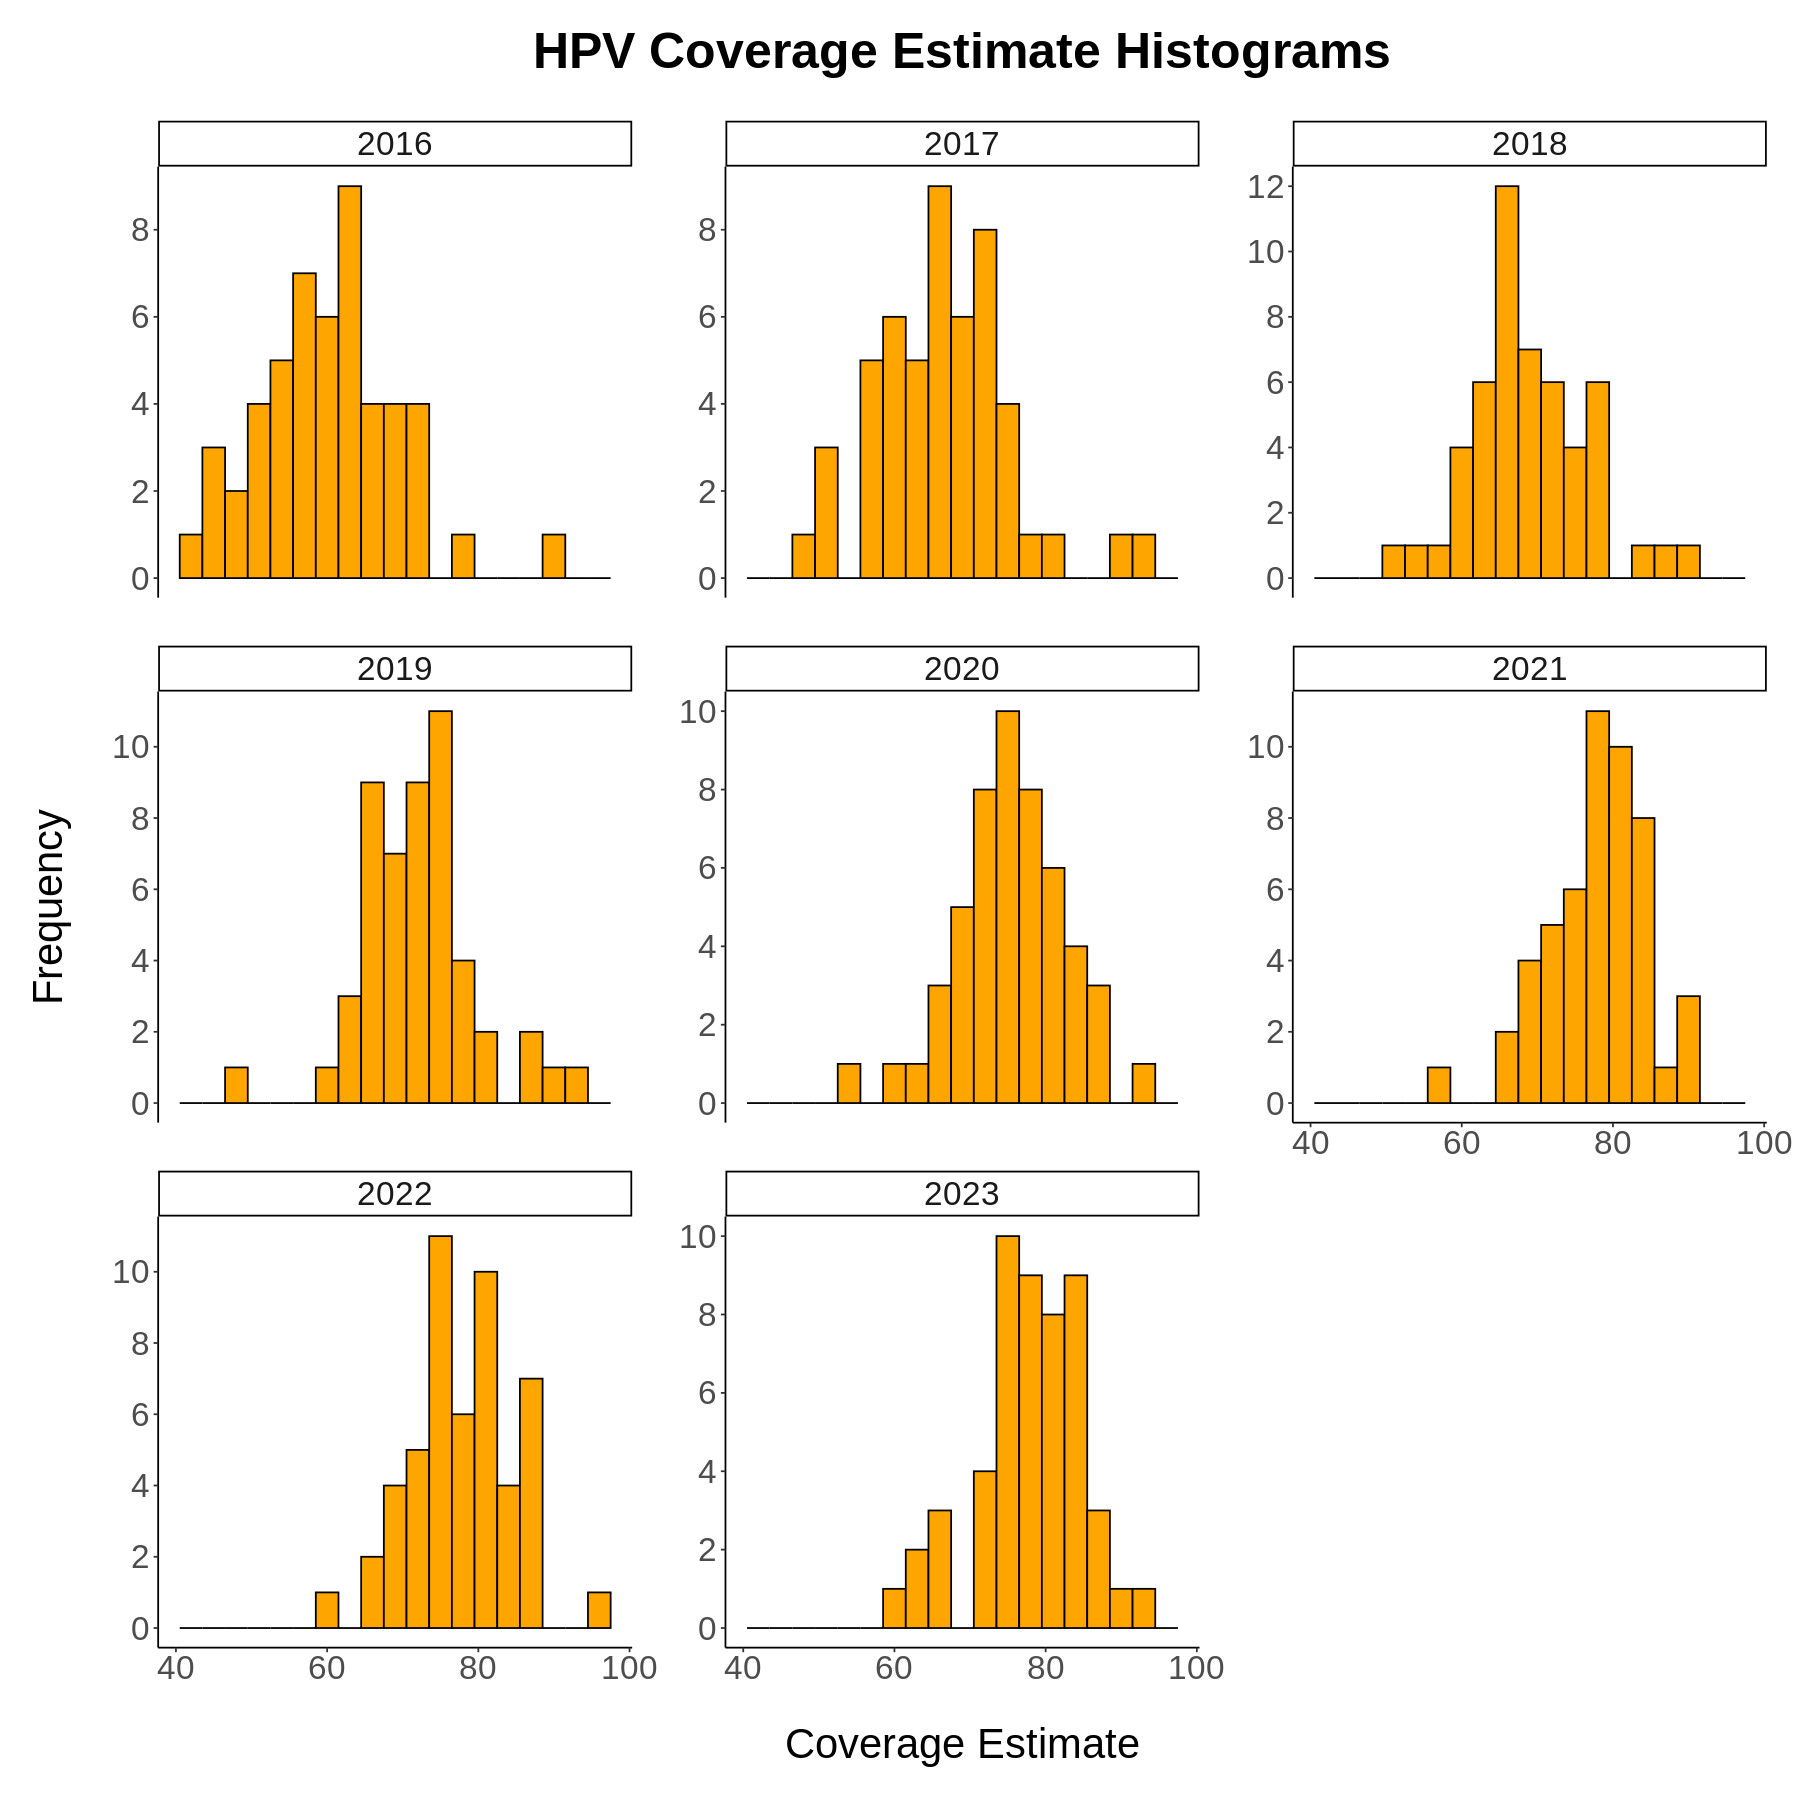

In [20]:
# Create HPV histograms with discrete y-axis
ggplot(hpv, aes(x = coverage_estimate)) +
  geom_histogram(binwidth = 3, fill = "orange", color = "black") +
  labs(title = "HPV Coverage Estimate Histograms",
       x = "Coverage Estimate",
       y = "Frequency") +
  theme_classic() +
  theme(text = element_text(size = 25),
        plot.title = element_text(hjust = 0.5, face = "bold", margin = margin(b = 25)),
        panel.spacing = unit(2, "lines"),
        plot.margin = margin(20, 20, 20, 20),
        axis.title.x = element_text(margin = margin(t = 25)),
        axis.title.y = element_text(margin = margin(r = 25))) +
  facet_wrap(~ year_season, scales = "free_y") +
  scale_y_continuous(breaks = seq(0, max(hpv$coverage_estimate), by = 2),
                     labels = as.character(seq(0, max(hpv$coverage_estimate), by = 2)))

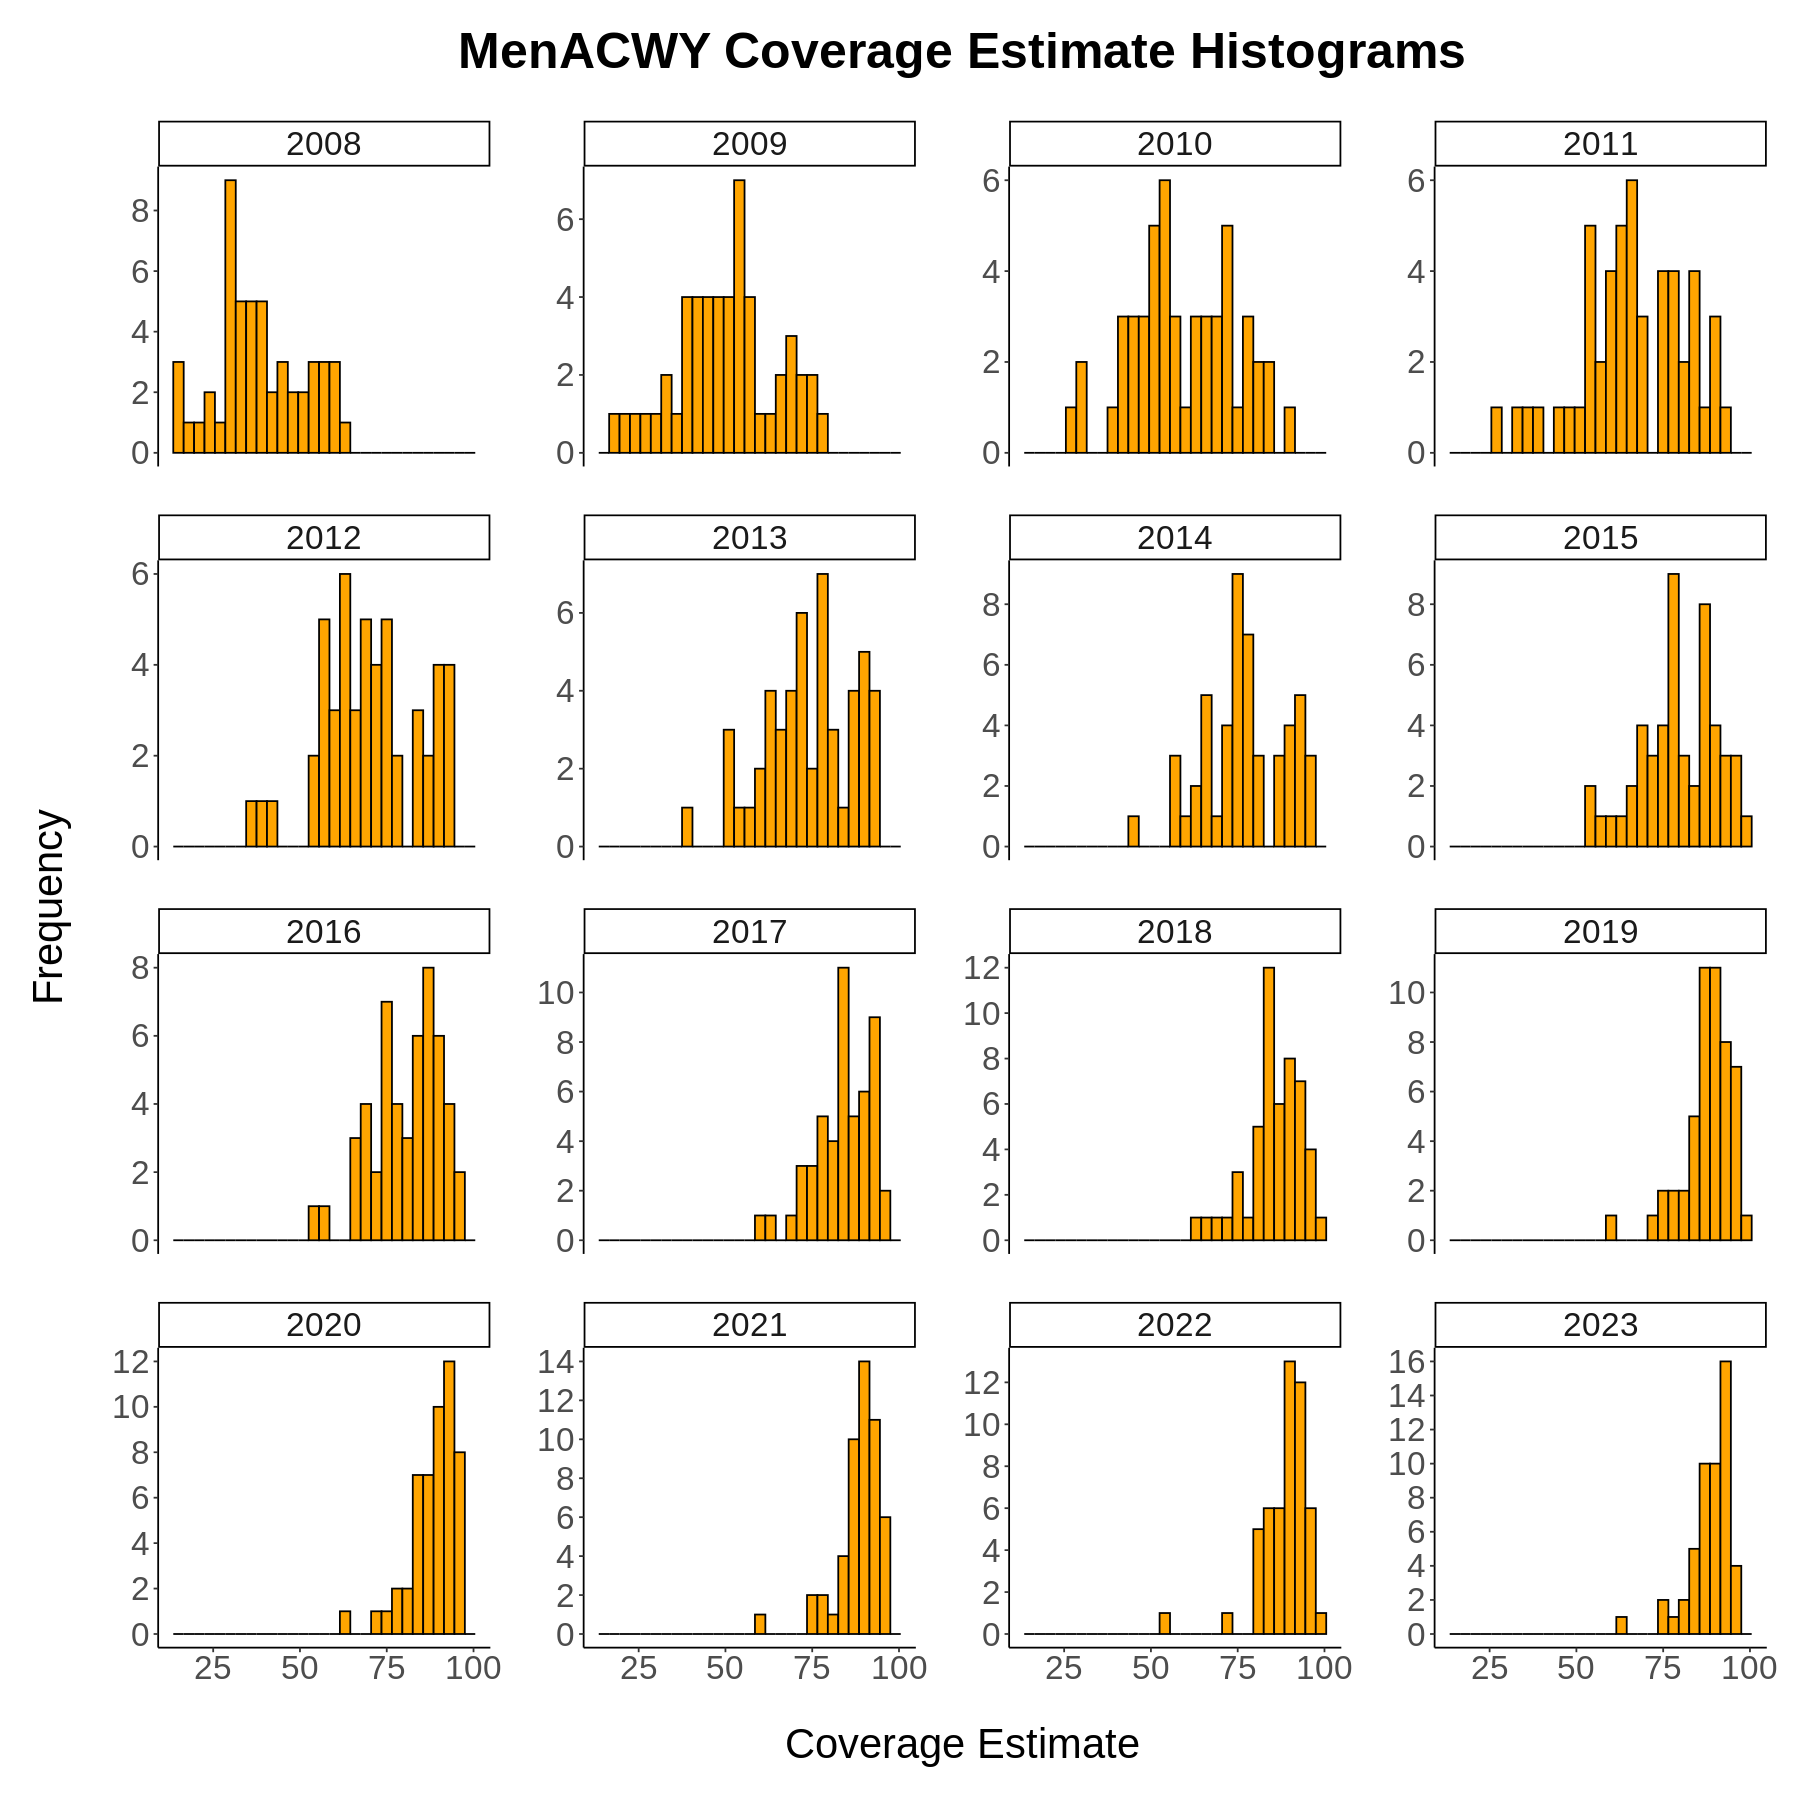

In [21]:
# Create MenACWY histograms with discrete y-axis
ggplot(menacwy, aes(x = coverage_estimate)) +
  geom_histogram(binwidth = 3, fill = "orange", color = "black") +
  labs(title = "MenACWY Coverage Estimate Histograms",
       x = "Coverage Estimate",
       y = "Frequency") +
  theme_classic() +
  theme(text = element_text(size = 25),
        plot.title = element_text(hjust = 0.5, face = "bold", margin = margin(b = 25)),
        panel.spacing = unit(2, "lines"),
        plot.margin = margin(20, 20, 20, 20),
        axis.title.x = element_text(margin = margin(t = 25)),
        axis.title.y = element_text(margin = margin(r = 25))) +
  facet_wrap(~ year_season, scales = "free_y") +
  scale_y_continuous(breaks = seq(0, max(hpv$coverage_estimate), by = 2),
                     labels = as.character(seq(0, max(hpv$coverage_estimate), by = 2)))

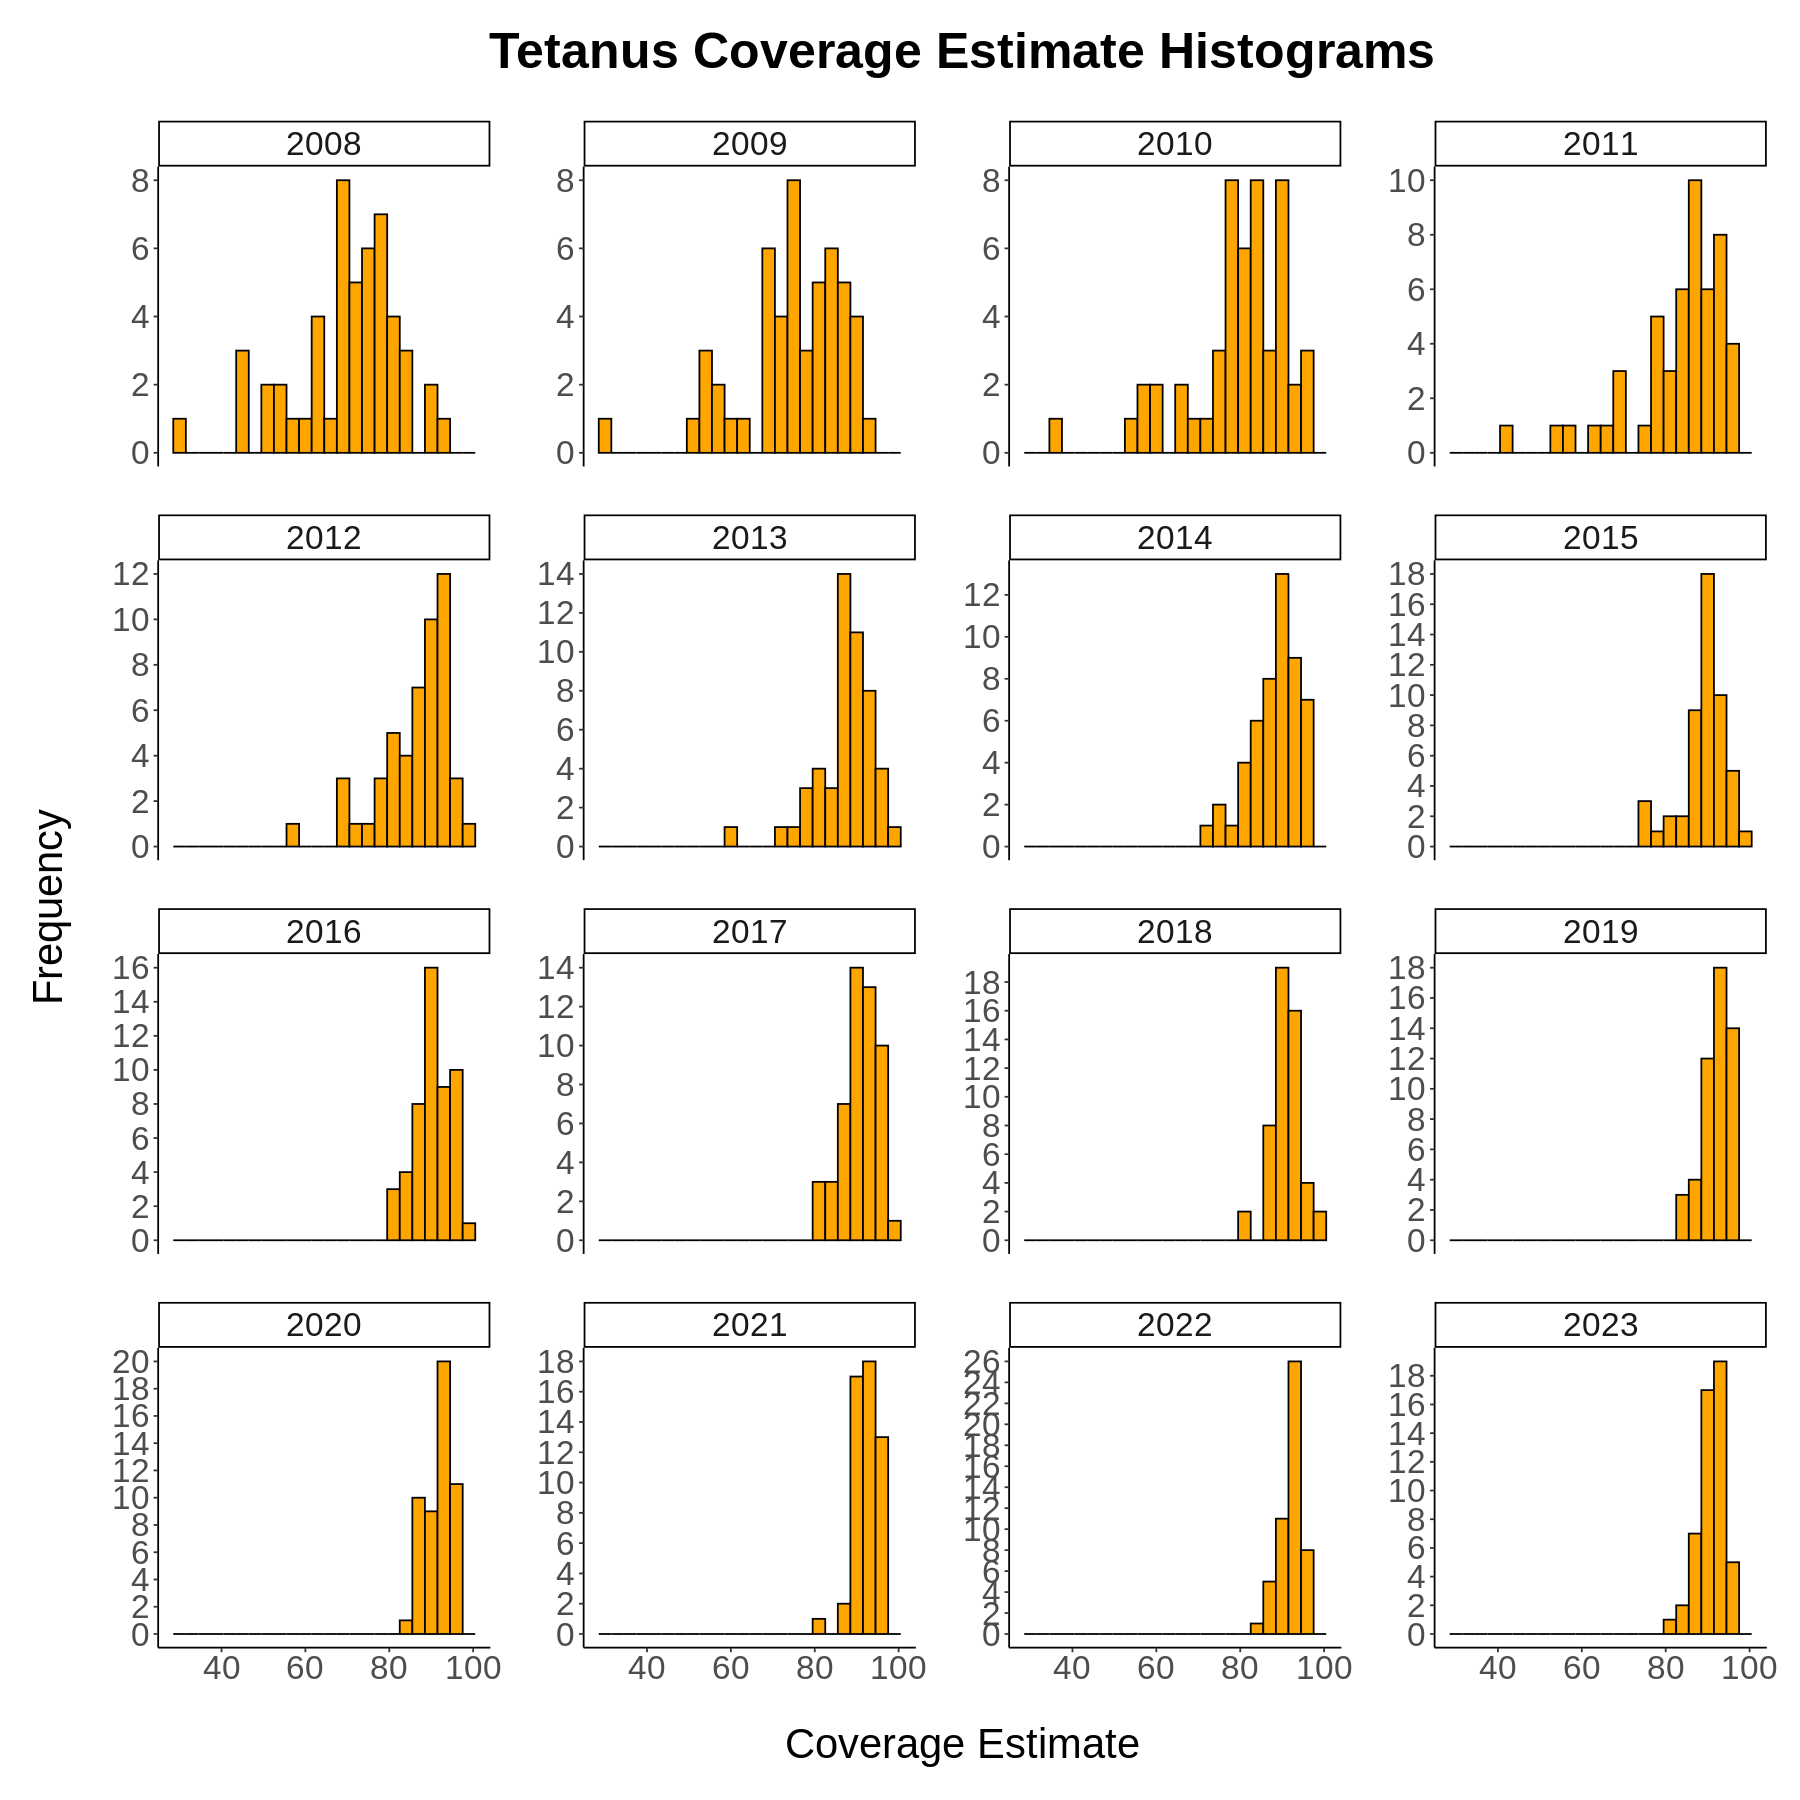

In [22]:
# Create Tetanus histograms with discrete y-axis
ggplot(tetanus, aes(x = coverage_estimate)) +
  geom_histogram(binwidth = 3, fill = "orange", color = "black") +
  labs(title = "Tetanus Coverage Estimate Histograms",
       x = "Coverage Estimate",
       y = "Frequency") +
  theme_classic() +
  theme(text = element_text(size = 25),
        plot.title = element_text(hjust = 0.5, face = "bold", margin = margin(b = 25)),
        panel.spacing = unit(2, "lines"),
        plot.margin = margin(20, 20, 20, 20),
        axis.title.x = element_text(margin = margin(t = 25)),
        axis.title.y = element_text(margin = margin(r = 25))) +
  facet_wrap(~ year_season, scales = "free_y") +
  scale_y_continuous(breaks = seq(0, max(hpv$coverage_estimate), by = 2),
                     labels = as.character(seq(0, max(hpv$coverage_estimate), by = 2)))